Found 990 files belonging to 3 classes.
Using 792 files for training.
Found 990 files belonging to 3 classes.
Using 198 files for validation.
Epoch 1/10


C:\Users\harip\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 261ms/step - accuracy: 0.3578 - loss: 40.9877 - val_accuracy: 0.3838 - val_loss: 11.8947
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.3790 - loss: 9.5833 - val_accuracy: 0.5303 - val_loss: 2.0552
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.5929 - loss: 2.0852 - val_accuracy: 0.5859 - val_loss: 1.1474
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 241ms/step - accuracy: 0.5789 - loss: 1.3603 - val_accuracy: 0.6010 - val_loss: 1.7935
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 241ms/step - accuracy: 0.5537 - loss: 2.3658 - val_accuracy: 0.5000 - val_loss: 1.7220
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 248ms/step - accuracy: 0.6922 - loss: 0.9208 - val_accuracy: 0.4091 - val_loss: 2.4341
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step - accuracy: 0.5330 - loss: 1.7584 - val_accuracy: 0.6566 - val_loss: 1.0732
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.5532 - loss: 1.9084 - val_accuracy: 0.6111 - va

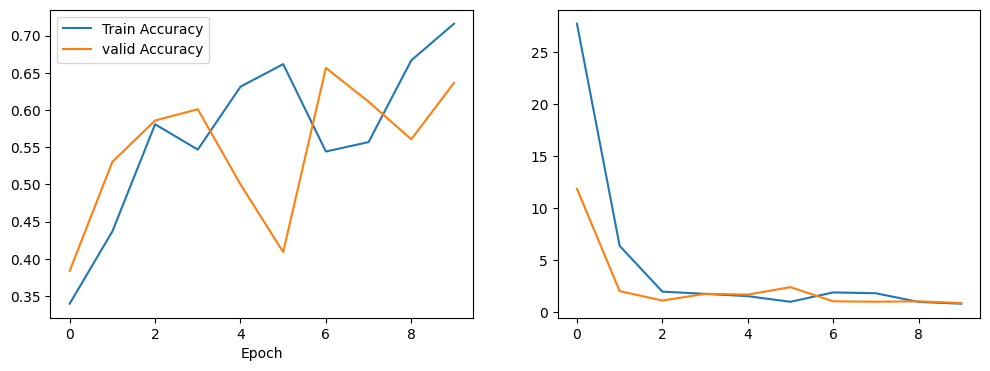

In [12]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


path=r"C:\Users\harip\Downloads\Bean_Dataset\Bean_Dataset"
full_ds=image_dataset_from_directory(
    path,
    validation_split=0.2,
    seed=123,
    subset="training",
    batch_size=32,
    image_size=(180,180)
)
valid_ds=image_dataset_from_directory(
    path,
    validation_split=0.2,
    seed=123,
    subset="validation",
    batch_size=32,
    image_size=(180,180)
)
class_names=full_ds.class_names
num_class=len(class_names)

def dnn():
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(180,180,3)),
        tf.keras.layers.Dense(512,activation="relu"),
        tf.keras.layers.Dense(256,activation="relu"),
        tf.keras.layers.Dense(num_class,activation="softmax")
    ])
        

model=dnn()
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = full_ds.map(lambda x, y: (normalization_layer(x), y))
valid_ds = valid_ds.map(lambda x, y: (normalization_layer(x), y))

history = model.fit(train_ds, validation_data=valid_ds, epochs=10)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='valid Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend()
ax2.plot(history.history['loss'], label='Train loss')
ax2.plot(history.history['val_loss'], label='valid loss')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


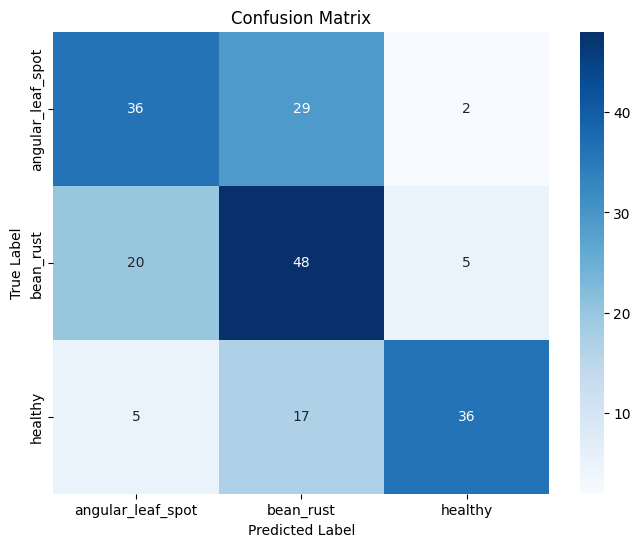

Classification Report:

                   precision    recall  f1-score   support

angular_leaf_spot       0.59      0.54      0.56        67
        bean_rust       0.51      0.66      0.57        73
          healthy       0.84      0.62      0.71        58

         accuracy                           0.61       198
        macro avg       0.65      0.61      0.62       198
     weighted avg       0.63      0.61      0.61       198



In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions on validation dataset
y_true = []
y_pred = []

for images, labels in valid_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, 
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


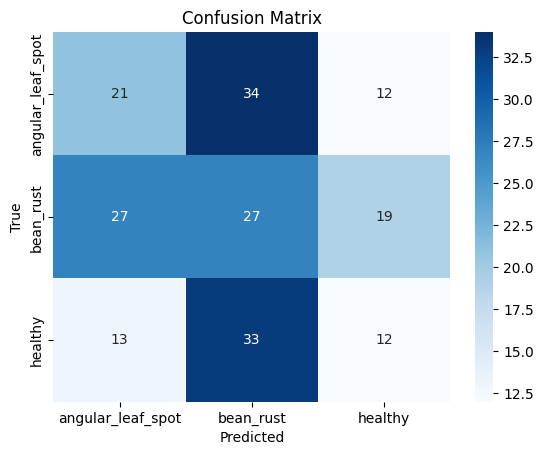

                   precision    recall  f1-score   support

angular_leaf_spot       0.34      0.31      0.33        67
        bean_rust       0.29      0.37      0.32        73
          healthy       0.28      0.21      0.24        58

         accuracy                           0.30       198
        macro avg       0.30      0.30      0.30       198
     weighted avg       0.30      0.30      0.30       198



In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on validation set
y_true = np.concatenate([y for _, y in valid_ds], axis=0)
y_pred = model.predict(valid_ds)
y_pred = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=class_names))


In [1]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [9]:
path=r"C:\Users\harip\Downloads\Bean_Dataset\Bean_Dataset"
full_ds=image_dataset_from_directory(
    path,
    validation_split=0.2,
    seed=123,
    batch_size=32,
    image_size=(224,224),
    subset="training"
)
valid_ds=image_dataset_from_directory(
    path,
    validation_split=0.2,
    seed=123,
    batch_size=32,
    image_size=(224,224),
    subset="validation"
)
class_name=full_ds.class_names
num_class=len(class_name)
print("Classes found:", class_name)
print("Number of classes:", num_class)

def cnn():
    return tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3) , activation="relu" , input_shape=(224,224,3)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, (3,3) , activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation="relu"),
        tf.keras.layers.Dense(num_class,activation="softmax"),
    ])
model=cnn()
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])
nm=tf.keras.layers.Rescaling(1./255)
train_ds=full_ds.map(lambda x,y: (nm(x),y))
valid_ds=valid_ds.map(lambda x,y: (nm(x),y))
history=model.fit(train_ds,validation_data=train_ds,epochs=10)        

Found 990 files belonging to 3 classes.
Using 792 files for training.
Found 990 files belonging to 3 classes.
Using 198 files for validation.
Classes found: ['angular_leaf_spot', 'bean_rust', 'healthy']
Number of classes: 3
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 626ms/step - accuracy: 0.3698 - loss: 4.6458 - val_accuracy: 0.5859 - val_loss: 0.8722
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 572ms/step - accuracy: 0.6285 - loss: 0.8507 - val_accuracy: 0.7197 - val_loss: 0.6499
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 564ms/step - accuracy: 0.7530 - loss: 0.6000 - val_accuracy: 0.8194 - val_loss: 0.5323
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 577ms/step - accuracy: 0.8292 - loss: 0.4472 - val_accuracy: 0.9419 - val_loss: 0.2783
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 574ms/step - accuracy: 0.9107 - loss: 0.2834 - val_accuracy: 0.9343 - val_loss: 0.1930
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 504ms/step - accuracy: 0.9526 - loss: 0.1600 - val_accuracy: 0.9949 - val_loss: 0.0529
Ep

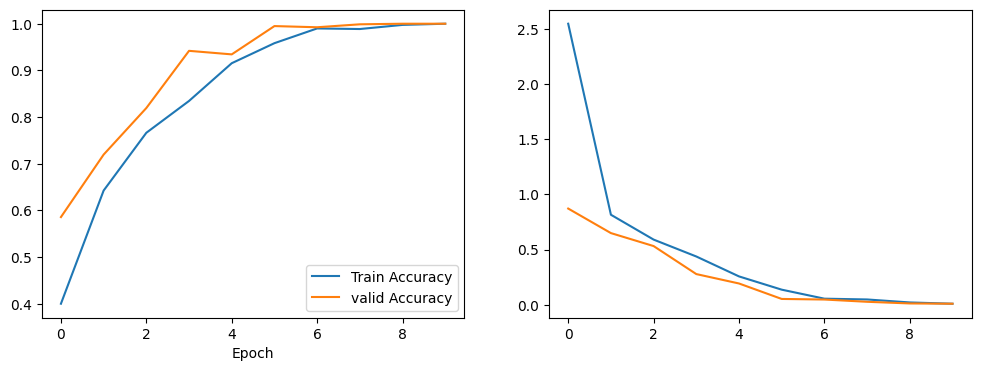

In [11]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='valid Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend()
ax2.plot(history.history['loss'], label='Train loss')
ax2.plot(history.history['val_loss'], label='valid loss')
